<a href="https://colab.research.google.com/github/lualua0909/DeepLearning-LDS8/blob/main/Week_1/ex3_multi_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [442]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [443]:
data = pd.read_csv('https://raw.githubusercontent.com/lualua0909/DeepLearning-LDS8/main/Data/iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


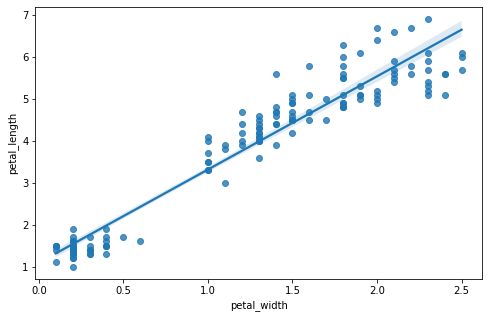

In [444]:
plt.figure(figsize=(8,5))
sns.regplot(data = data, x ="petal_width", y ="petal_length")
plt.show()

In [445]:
def multiple_regression(intercept, features, slopes):
  return intercept + tf.reduce_sum(slopes * features, 0)

In [446]:
def loss_function(intercept, slopes, features, targets):
  predictions = multiple_regression(intercept, features, slopes)
  return tf.keras.losses.mse(targets, predictions)

In [447]:
sepal_length = tf.cast(data.sepal_length, tf.float32)
sepal_width = tf.cast(data.sepal_width, tf.float32)
petal_length = tf.cast(data.petal_length, tf.float32)
targets = tf.cast(data.petal_width, tf.float32)
features = np.array([sepal_length, sepal_width, petal_length])

In [450]:
intercept = tf.Variable(0.1, tf.float32)
slopes = tf.Variable(np.full((features.shape[0], 1), 0.1), dtype=tf.float32)

In [451]:
slopes

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.1],
       [0.1],
       [0.1]], dtype=float32)>

In [452]:
opt = tf.keras.optimizers.Adam()

In [453]:
for j in range(10000):
  opt.minimize(lambda: loss_function(intercept, slopes, features, targets), var_list=[intercept, slopes])
  if j % 1000 == 0:
    print(loss_function(intercept, slopes, features, targets))

tf.Tensor(0.32399976, shape=(), dtype=float32)
tf.Tensor(0.0415482, shape=(), dtype=float32)
tf.Tensor(0.036433335, shape=(), dtype=float32)
tf.Tensor(0.03585192, shape=(), dtype=float32)
tf.Tensor(0.03584116, shape=(), dtype=float32)
tf.Tensor(0.035841115, shape=(), dtype=float32)
tf.Tensor(0.035841107, shape=(), dtype=float32)
tf.Tensor(0.035841115, shape=(), dtype=float32)
tf.Tensor(0.035841107, shape=(), dtype=float32)
tf.Tensor(0.03584154, shape=(), dtype=float32)


In [454]:
print(intercept, slopes)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.24872388> <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.21027166],
       [ 0.22877692],
       [ 0.52608794]], dtype=float32)>


In [456]:
# Dự đoán
x_new = np.array([[5.1], [3.5], [1.4]])
y_new = multiple_regression(intercept, x_new, slopes)
y_new.numpy()

array([0.21613298], dtype=float32)